In [1]:
import  os
from  PIL import Image
from torch.utils.data import Dataset
import numpy as np

In [ ]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
NUM_EPOCHS = 10
BUTCH_SIZE = 10

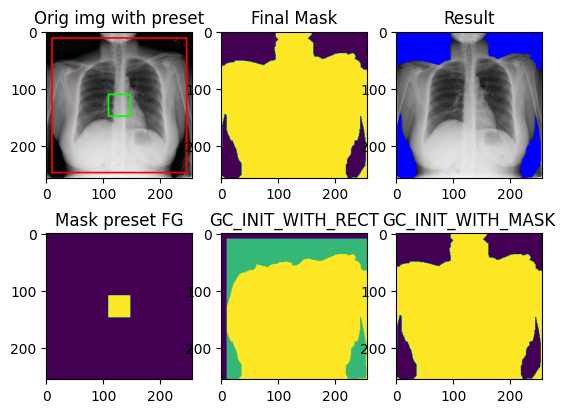

In [3]:
class LungDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = os.listdir(image_dir)
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.image_dir, self.images[index])
        mask_path = os.path.join(self.mask_dir, self.images[index])
        
        image = np.array(Image.open(img_path).convert('L'))
        mask = np.array(Image.open(mask_path).convert('L'), dtype=np.float32)
        mask[mask == 255.0] = 1.0
        
        if self.transform is not None:
            augmentations = self.transform(image=image, mask=mask)
            image = augmentations['image']
            mask = augmentations['mask']

In [ ]:
# todo: add transform
train_dataset = LungDataset(image_dir=IMAGE_DIR, mask_dir=MASK_DIR, transform=)
train_loader = DataLoader(train_dataset, batch_size=BUTCH_SIZE)

In [ ]:
def save_checkpoint(state, filename='checkpoint.pth.tar'):
    torch.save(state,filename)

def load_checkpoint(checkpoint, model):
    model.load_state_dict(checkpoint['state_dict'])
    
# todo: add check_accuracy 42:30 and 49:00

def save_pred_to_file(loader, model, folder='preds/'):
    model.eval()
    # todo: change from loader to simple array[images]
    for i, (x, y) in enumerate(loader):
        x = x.to(device=DEVICE)
        with torch.no_grad():
            preds = torch.sigmoid(model(x))
            preds = (preds > 0.5).float()
        torchvision.utils.save_image(preds, os.path.join(folder, f'pred_{i}.png'))

In [ ]:
model = UNET(in_channls=1, out_channels=1).to(DEVICE)

loss = nn.BCEWithLogistsLoss()
# todo: change to another optimizer 37:30
optimizer = optim.Adam(model.parameters(), lr=LEARNIN_RATE)


scaler = torch.cuda.amp.GradScaler()
for epoch in range(NUM_EPOCHS):
    train_fn(train_loader, model, optimizer, loss_fn, scaler)
    
    checkpoint = {
        'state_dict': model.state_dict(),
        'optimizer': optimizer.state_dict()
    }
    save_checkpoint(checkpoint)
    
    # check_accuracy()
    
    save_pred_to_file(test_loader, model)